In [4]:
from sklearn.datasets import load_iris

iris_datasets = load_iris()

print(type(iris_datasets), iris_datasets.keys())


<class 'sklearn.utils.Bunch'> dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [12]:
iris_datasets['data']
iris_datasets['target']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [6]:
iris_datasets['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

# iris_data(bunch) to pandas dataframe

In [10]:
import pandas as pd
iris_df = pd.DataFrame(iris_datasets['data'], columns=iris_datasets['feature_names'])

In [11]:
iris_df['target'] = iris_datasets['target']
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [13]:
dict(enumerate(iris_datasets['target_names']))

{0: 'setosa', 1: 'versicolor', 2: 'virginica'}

In [19]:
iris_df['target'].head()
iris_df.target.head()

## Those two have same output 

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: target, Length: 150, dtype: int64

In [22]:
# To make table more good to see
iris_df['label'] = iris_df.target.replace(dict(enumerate(iris_datasets['target_names'])))
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,label
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [23]:
iris_df.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,label
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica
149,5.9,3.0,5.1,1.8,2,virginica


In [26]:
iris_df.iloc[:,0:4].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


# Seperate train data and Test data
    * train data : for training
    * test data : for testing. >> prediction
    
    * 함수에서 입력을 x, 출력을 y >> f(x) = y
    * 입력데이터는 대문자 x로 표기하고 레이블은 y로 표기한다.
    * X_train, y_train, X_test, y_test
    * X_train(훈련데이터)는 75%, X_test(테스트 데이터)는 25%


In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train, y_test = train_test_split(iris_df.iloc[:,0:4], iris_df['target'])

In [31]:
print(X_train.shape)
print(y_train.shape)

(112, 4)
(112,)


In [32]:
print(X_test.shape)
print(y_test.shape)

(38, 4)
(38,)


In [35]:
X_train, X_test,y_train, y_test = train_test_split(iris_df.iloc[:,0:4], iris_df['target'], test_size=0.33)

In [36]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(100, 4)
(100,)
(50, 4)
(50,)


# 학습방법(Model 선택)
    * K-NN(nearest neighbors) 최근접 이웃 분류기 사용
    * K지수 - 이웃의 개수는 3으로 설정

In [42]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=3)
model

KNeighborsClassifier(n_neighbors=3)

In [43]:
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [51]:
y_predict = model.predict(X_test)
y_predict

array([2, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 2, 1, 2, 2, 2, 2, 1, 0, 2, 1, 1,
       2, 0, 2, 1, 0, 0, 2, 0, 2, 1, 0, 1, 2, 0, 1, 2, 1, 1, 2, 2, 1, 2,
       1, 0, 0, 0, 2, 2])

# compare y_test and y_predict

In [55]:
import numpy as np
print('Accuracy of test : {:.2f}'.format(np.mean(y_predict==y_test)))

print('use score : {:.2f}'.format(model.score(X_test,y_test)))

Accuracy of test : 0.98
use score : 0.98


In [59]:
train_accuracy = []
test_accuracy = []
neighbors_settings = range(1,20,2)
for neighbor in neighbors_settings:
    print(neighbor)
    model = KNeighborsClassifier(n_neighbors=neighbor)
    model.fit(X_train, y_train)
    train_accuracy.append(model.score(X_train, y_train))
    test_accuracy.append(model.score(X_test,y_test))
print(train_accuracy)
print(test_accuracy)

1
3
5
7
9
11
13
15
17
19
[1.0, 0.97, 0.98, 0.98, 0.98, 0.98, 0.98, 0.97, 0.98, 0.98]
[0.98, 0.98, 0.96, 0.96, 0.94, 0.96, 0.96, 0.96, 0.96, 0.98]


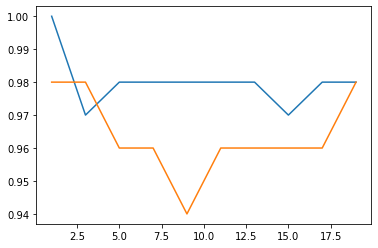

In [61]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(neighbors_settings, train_accuracy, label='train accuracy')
plt.plot(neighbors_settings, test_accuracy, label='test accuracy')